In [86]:
from humanize import intword # intword es una función que convierte un número en una cadena legible por humanos
from sklearn.linear_model import LinearRegression # LinearRegression es una clase para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score # mean_squared_error y r2_score son funciones para evaluar el modelo
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm # Statsmodels es una librería para el análisis de datos
import plotly.express as px # Plotly es una librería para la visualización de datos

In [3]:
sns.set_style("darkgrid")

In [4]:
apartamentos = pd.read_csv("https://raw.githubusercontent.com/Builker-col/bogota-apartments/master/data/processed/metrocuadrado/venta_apartamentos_bogota.csv")
apartamentos.head()

,precio,habitaciones,baños,estrato,codigo,antiguedad,area_m2,administracion,parqueaderos,piso,...,longitud,descripcion,localidad,barrio,distancia_estacion_tm_m,estacion_tm_cercana,cerca_estacion_tm,distancia_paradero_sitp_m,paradero_sitp_cercano,cerca_paradero_sitp
0,820000000.0,3.0,3.0,6.0,10677-M3878516,Entre 0 y 5 años,96.00,603653.0,2.0,4.0,...,-74.046180,Vendo espectacular apartamento ubicado cerca d...,USAQUEN,SANTA BARBARA OCCIDENTAL,944.50,Calle 127,0,325.41,CARRERA 16A,0
1,835000000.0,3.0,3.0,5.0,2259-M3843923,Entre 5 y 10 años,114.00,600000.0,2.0,7.0,...,-74.108025,Venta de este espectacular Apartamento de 114 ...,TEUSAQUILLO,CIUDAD SALITRE SURORIENTAL,833.08,Salitre - El Greco,0,70.02,ZONA IND. SREDNI,1
2,269000000.0,2.0,2.0,3.0,399-M4081020,Entre 0 y 5 años,53.00,150000.0,1.0,11.0,...,-74.158000,Hermoso apto en piso 11 para estrenar con vist...,KENNEDY,S.C. OSORIO II - LA MAGDALENA CIUDAD TINTAL,1907.33,Biblioteca Tintal,0,106.87,EL PORVENIR,1
3,420000000.0,3.0,2.0,4.0,13436-M4200394,Más de 20 años,75.00,380000.0,1.0,1.0,...,-74.042114,"Rentahouse Vende Apartamento remodelado, muy i...",USAQUEN,LOS CEDRITOS,947.80,Calle 142,0,174.24,BR. LOS CEDROS,1
4,330000000.0,1.0,2.0,4.0,11139-M3866083,Entre 0 y 5 años,43.18,237500.0,1.0,4.0,...,-74.063000,Apartaestudio para estrenar con todas las como...,CHAPINERO,S.C. CHAPINERO CENTRAL,384.96,Calle 57,1,147.36,BR. CHAPINERO CENTRAL,1


In [7]:
apartamentos.shape

(11776, 50)

In [6]:
chapinero = apartamentos.loc[apartamentos["localidad"] == "CHAPINERO"]
chapinero.shape

(2975, 50)

In [83]:
fig = px.scatter_mapbox(
    chapinero.loc[chapinero["precio"] < 6e9],
    lat="latitud",
    lon="longitud",
    color="precio",
    zoom=12,
    height=500,
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
    )
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [8]:
chapinero.barrio.unique()

array(['S.C. CHAPINERO CENTRAL', 'S.C. BELLAVISTA',
       'BOSQUE EL RETIRO I SECTOR', 'S.C. ANTIGUO COUNTRY', 'CHICO ALTO',
       'LA CABRERA', 'S.C. CHICO NORTE III SECTOR', 'LOS ROSALES',
       'URB. BELMONTE', 'S.C. CHICO NORTE', 'ALTOS DE LA SALLE',
       'EL REFUGIO', 'S.C. EL CHICO', 'S.C. CATALUNA', 'S.C. LAGO GAITAN',
       'S.C. EL NOGAL', 'S.C. GRANADA', 'CHICO RESERVADO',
       'CHICO RESERVADO II SECTOR', 'S.C INGEMAR', 'S.C. LAS ACACIAS',
       'PINAR ALTO - PINAR II', 'S.C. PARDO RUBIO', 'NUEVA_GRANADA',
       'S.C. BOSQUE CALDERON', 'S.C. LA SALLE',
       'BELLAVISTA - URB. EL CASTILLO', 'SIERRAS DEL CHICO',
       'S.C. EL RETIRO', 'SIBERIA - BOSQUE CALDERON TEJADA', 'S.C. SUCRE',
       'S.C. MARIA CRISTINA', 'CHICO ORIENTAL', 'S.C. INGEMAR ORIENTAL',
       'ALTOS DE MONTECARLO', 'S.C. EMAUS', 'S.C. MARLY',
       'S.C. PORCIUNCULA', 'S.C. ESPARTILLAL',
       'SAN MARTIN DE PORRES III Y IV', 'EL_PARAISO',
       'S.C. QUINTA CAMACHO', 'S.C. SEMINARIO', 'URB

In [20]:
cabrera = chapinero.loc[chapinero["barrio"] == "LA CABRERA"]
cabrera.shape

(151, 50)

In [67]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [75]:
fig = px.scatter_mapbox(
    cabrera,
    lat="latitud",
    lon="longitud",
    color="precio",
    zoom=12,
    height=500,
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
    )
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

<Axes: >

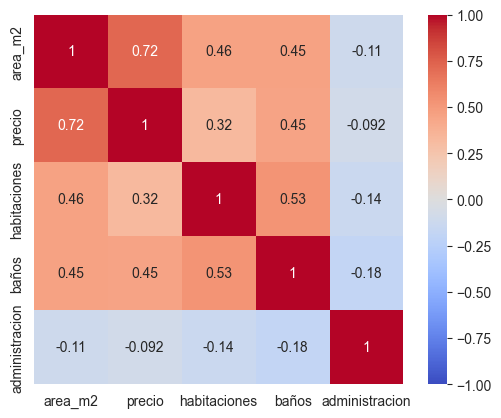

In [55]:
sns.heatmap(
    cabrera.loc[:, ["area_m2", "precio", "habitaciones", "baños", "administracion"]].corr(), 
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True
)

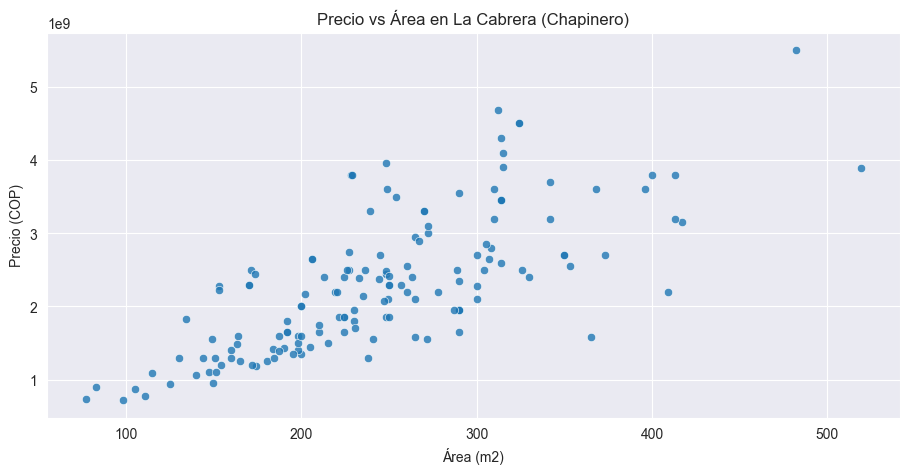

In [24]:
plt.figure(figsize=(11, 5))

sns.scatterplot(
    x='area_m2', 
    y='precio', 
    data=cabrera,
    alpha=.8
)

plt.title("Precio vs Área en La Cabrera (Chapinero)")
plt.xlabel("Área (m2)")
plt.ylabel("Precio (COP)")

plt.show()

## Analisis de regresion lineal simple

In [27]:
# https://www.statsmodels.org/stable/regression.html

regresion = sm.OLS(cabrera["precio"], sm.add_constant(cabrera["area_m2"])).fit()
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           6.68e-26
Time:                        00:22:12   Log-Likelihood:                -3276.4
No. Observations:                 151   AIC:                             6557.
Df Residuals:                     149   BIC:                             6563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.832e+08   1.74e+08      1.052      0.294   -1.61e+08    5.27e+08
area_m2     8.704e+06   6.77e+05     12.848      0.000    7.37e+06       1e+07
==============================================================================
Omnibus:                       11.968   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.413
Skew:                           0.651   Prob(JB):                      0.00202
Kurtosis:                       3.529   Cond. No.                         851.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Creando el modelo de regresion lineal simple

In [28]:
X = cabrera["area_m2"]
y = cabrera["precio"]

X.shape, y.shape

((151,), (151,))

In [30]:
lr = LinearRegression()
model = lr.fit(X.values.reshape(-1, 1), y)

In [33]:
print("Intercepto:", model.intercept_)
print("Coeficiente:", model.coef_[0])

Intercepto: 183186540.8805437
Coeficiente: 8704049.429607525


In [84]:
print("R2:", r2_score(y, model.predict(X.values.reshape(-1, 1))))
print("RMSE:", np.sqrt(mean_squared_error(y, model.predict(X.values.reshape(-1, 1)))))

R2: 0.5255919493528239
RMSE: 641136621.772395


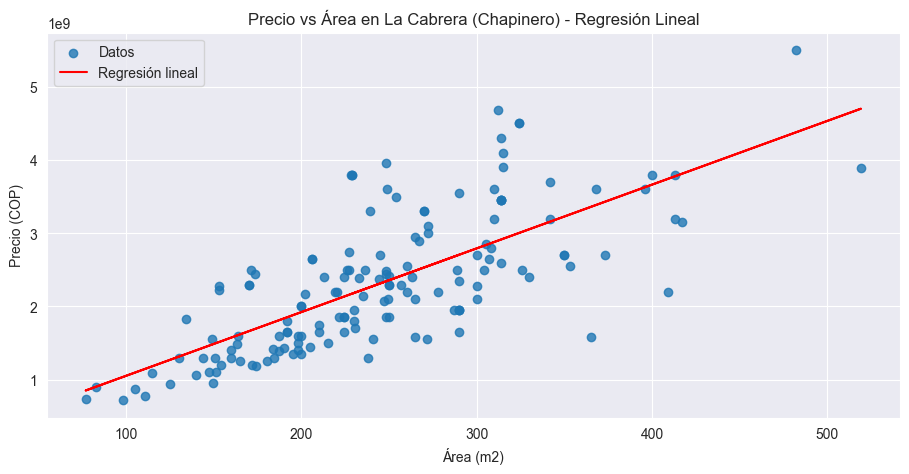

In [35]:
plt.figure(figsize=(11, 5))

plt.scatter(X, y, alpha=.8, label="Datos")
plt.plot(X, model.predict(X.values.reshape(-1, 1)), color="red", label="Regresión lineal")

plt.title("Precio vs Área en La Cabrera (Chapinero) - Regresión Lineal")
plt.xlabel("Área (m2)")
plt.ylabel("Precio (COP)")

plt.legend()

plt.show()


## Generando predicciones

In [39]:
area_m2 = 500
precio_prediccion = model.predict([[area_m2]])

precio_prediccion[0]

4535211255.684306

In [42]:
print(f"El precio de un apartamento de {area_m2} m2 en La Cabrera es de {intword(precio_prediccion[0], format='%.2f')} COP")

El precio de un apartamento de 500 m2 en La Cabrera es de 4.54 billion COP


In [88]:
import session_info
session_info.show(html = False, dependencies = True)

-----
dotenv              NA
humanize            4.6.0
matplotlib          3.7.1
numpy               1.23.5
pandas              2.0.1
plotly              5.14.1
scipy               1.10.1
seaborn             0.12.2
session_info        1.0.0
sklearn             1.2.2
statsmodels         0.14.0
-----
PIL                 9.5.0
asttokens           NA
attr                23.1.0
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
django              4.2.2
executing           1.2.0
fastjsonschema      NA
google              NA
idna                3.4
ipykernel           6.23.0
jedi                0.18.2
joblib              1.2.0
jsonschema          4.17.3
kiwisolver          1.4.4
matplotlib_inline   0.1.6
mpl_toolkits        NA
nbformat            5.8.0
nt                  NA
ntsecuritycon       NA
packaging      